<a href="https://colab.research.google.com/github/AlexAlexeyuk/Alexander.Alexeyuk/blob/master/generation4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pandas as pd
import numpy as np
!pip install sdv

In [156]:
import matplotlib.pyplot as plt


In [157]:
df  = pd.read_csv('/content/Proc_data_1.csv')

In [158]:

df = df.drop(['Hemoglobin','Unnamed: 0', 'Unnamed: 0.1',
         'ID', 'Diagnosis', 
         'COVID-19'], axis=1)

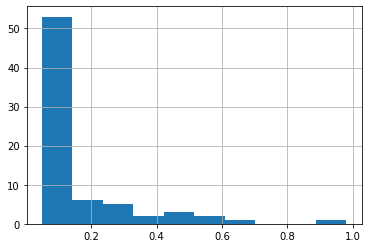

In [ ]:
df['Initial_Procalcitonine'].hist()


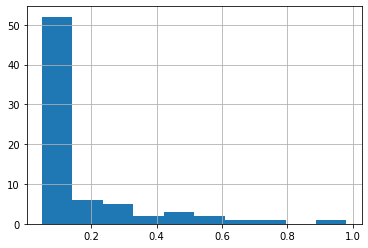

In [ ]:
df['Max_Procalcitonine'].hist()

In [160]:
# переводим наши даты в формат пандас
for i in ['Birthday', 'Admission', 'Discharge']:
  df[i] = pd.to_datetime(df[i], format = "%d:%m:%Y")
# длительность госпитализации = выписка - поступление
df["duration"] = (df['Discharge'] - df['Admission']).dt.days

# возраст пациента рассчитаем: день рождения - поступление = дни и целочисленно делим на 356
df["Age"] = ((df['Admission'] - df['Birthday']).dt.days) // 356
data = df.drop(['Birthday', 'Admission', 'Discharge'], axis=1)

In [161]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(df)
new_data_1 = model.sample(400)
new_data_1.head()

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr

,Max_Platlets,Min_Platlets,Max_Leucocytes,Min_Leucocytes,Max_Creatinine,Min_Cratinine,Gender,initial_CRP,Max_CRP,Treatment,Birthday,Admission,Discharge,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF,ALT,AST,Initial_Procalcitonine,Max_Procalcitonine,duration,Age
0,285.172818,285.242534,11.668202,11.665753,101.266048,83.635372,male,0.498560,4.163077,"цефтриаксон, глюкоза, вит. с, фрагмин, омепра...",1952-03-28,2021-01-19,2021-01-23,1,0,1,0,0,0,0,-0.416142,45.861298,7.886802,0.219611,0.157277,9,68
1,350.908044,350.874077,11.678031,11.678783,105.127198,70.393810,male,13.458354,1.293862,"дексаметазон, гепарин, фамотидин, парацетамол...",1968-01-16,2020-08-23,2020-11-24,1,1,0,0,0,0,0,1.641096,10.310594,0.215320,0.149311,0.138303,25,43
2,223.487350,223.519619,11.377648,11.379763,107.204905,74.944780,male,5.565566,11.944603,"цефтриаксон, дексаметазон, гепарин, парацетам...",1979-09-14,2020-11-17,2021-01-29,1,1,-1,0,0,0,0,2.822994,71.466698,26.065321,0.068476,0.064911,25,42
3,360.900169,360.888965,11.797338,11.797091,112.910427,66.523662,male,69.837857,34.639941,"цефтриаксон, дексаметазон, эноксапарин, аце...",1956-12-09,2020-09-04,2021-01-14,1,1,0,0,0,0,0,1.688467,45.306939,19.320531,0.314717,0.264842,19,69
4,215.815522,215.754058,9.334102,9.331187,113.331670,77.589488,male,2.276815,16.459769,"фраксипарин , аспикард, цефтриаксон, лизинопри...",1946-12-18,2021-03-30,2021-02-01,1,0,0,0,0,0,0,1.887184,93.218223,73.421171,0.147366,0.108558,14,64


In [162]:
new_data_1 = new_data_1[new_data_1['Max_Procalcitonine']>.4]

In [170]:
new_data_1.shape

(20, 27)

In [562]:
from sdv.tabular import GaussianCopula
model_ = GaussianCopula()
model_.fit(data)
new_data_2 = model_.sample(524)
new_data_2.head()

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr

,Max_Platlets,Min_Platlets,Max_Leucocytes,Min_Leucocytes,Max_Creatinine,Min_Cratinine,Gender,initial_CRP,Max_CRP,Treatment,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF,ALT,AST,Initial_Procalcitonine,Max_Procalcitonine,duration,Age
0,292.175937,292.155824,11.606018,11.609350,104.119435,65.682535,male,3.038042,1.254175,"дексаметазон, гепарин, фамотидин, парацетамол...",1,1,1,0,0,0,0,1.209985,-147.416363,-145.822674,0.164071,0.097985,32,49
1,277.839645,277.841601,17.006865,17.003836,62.152268,41.089060,female,2.417075,40.491946,"инванз, ксарелто, пантопрозол, эноксипарин, ...",1,0,1,0,0,0,0,0.272171,58.182277,28.451836,0.074933,0.076368,16,78
2,371.031428,371.074535,15.042500,15.039610,71.664839,55.376739,female,25.794113,152.013548,"цефтриаксон, дексаметазон, гидроксихлорохин,...",1,1,0,0,0,0,0,0.660539,91.339983,36.326748,0.274433,0.216835,8,51
3,205.225210,205.317276,15.915514,15.913853,46.727548,-6.236082,male,68.396466,133.729560,"ванкомицин, кпс, фуросемид, имепенем, ацетилц...",1,0,1,0,0,0,0,0.982082,58.124755,27.316142,0.112720,0.076241,21,57
4,284.940272,284.908212,8.860139,8.859701,98.339385,81.949704,male,41.704509,36.882978,"дексаметазон, кпс, аспикард, лозартон аторвас...",1,1,0,0,0,0,0,1.347285,64.453893,48.136058,0.066724,0.067892,15,59


In [163]:
from sdv.tabular import CTGAN

model2 = CTGAN()
model2.fit(df)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-pac

In [440]:
new_data_2 = model2.sample(600)

In [441]:
new_data_2.shape

(600, 27)

In [377]:
l = df[df['Max_Procalcitonine']>.4]

In [378]:
l.shape

(8, 27)

In [563]:
new_data_2= new_data_2.append(l)

In [246]:
# new_data_2= new_data_2.append(new_data_2_)

In [311]:
new_data_2.shape

(548, 27)

In [240]:
model2_ = CTGAN()
model2_.fit(data)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/s

In [501]:
new_data_2 = model2_.sample(480)

In [312]:
new_data_2_ = new_data_2_[(new_data_2_['Max_Procalcitonine'] > .5) & (new_data_2_['Max_Procalcitonine'] < 1.2)]

In [313]:
new_data_2_.shape

(25, 24)

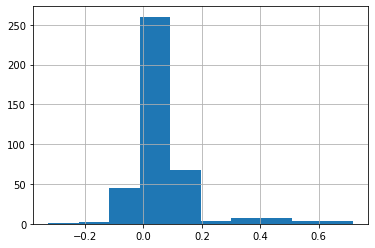

In [ ]:
new_data_2['Max_Procalcitonine'].hist()

In [502]:
new_data_2= new_data_2.append(l)

In [315]:
# new_data_2= new_data_2.append(df)

In [ ]:
# переводим наши даты в формат пандас
for i in ['Birthday', 'Admission', 'Discharge']:
  df[i] = pd.to_datetime(df[i], format = "%d:%m:%Y")
# длительность госпитализации = выписка - поступление
df["duration"] = (df['Discharge'] - df['Admission']).dt.days

# возраст пациента рассчитаем: день рождения - поступление = дни и целочисленно делим на 356
df["Age"] = ((df['Admission'] - df['Birthday']).dt.days) // 356
data = df.drop(['Birthday', 'Admission', 'Discharge'], axis=1)
new_data_1['Age'] =  new_data_1['Age'].map(lambda x: x + 10 if x < 10 else x)

In [503]:
new_data_2.columns


Index(['Max_Platlets', 'Min_Platlets', 'Max_Leucocytes', 'Min_Leucocytes',
       'Max_Creatinine', 'Min_Cratinine', 'Gender', 'initial_CRP', 'Max_CRP',
       'Treatment', 'Pneumonia', 'Severity', 'IHD', 'COPD', 'Bronchial_asthma',
       'Obesity', 'Diabetes', 'RF', 'ALT', 'AST', 'Initial_Procalcitonine',
       'Max_Procalcitonine', 'duration', 'Age', 'Birthday', 'Admission',
       'Discharge'],
      dtype='object')

In [564]:

new_data_2['Age'] =  new_data_2['Age'].map(lambda x: x + 10 if x < 10 else x)

In [565]:
dataf = new_data_2.copy()

In [566]:
dataf = dataf.drop([
          "Treatment", 'duration',
          'Birthday', 'Admission', 'Discharge', 
          'Pneumonia', ], axis=1)

In [567]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [568]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [569]:
def ind_ab(x):
  if x > .4:
    return 1
  else:
    return 0

In [570]:
dataf['Ab_ind'] = dataf['Max_Procalcitonine'].apply(ind_ab)

In [571]:
dataf['Ab_ind'].value_counts()

0    488
1     44
Name: Ab_ind, dtype: int64

In [572]:
dataf = dataf.drop(['Unnamed: 0', 'Unnamed: 0.1',
         'ID', 'Diagnosis', 
         'COVID-19', "Treatment"], axis=1)

KeyError: ignored

In [573]:
neg, pos = np.bincount(dataf['Ab_ind'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 532
    Positive: 44 (8.27% of total)



In [574]:
dataf[['Max_Platlets', 'Min_Platlets', 'Max_Leucocytes', 'Min_Leucocytes',
        'Max_Creatinine', 'Min_Cratinine', 'Gender',
       'initial_CRP', 'Max_CRP',  'Severity', 'IHD', 'COPD',
       'Bronchial_asthma', 'Obesity', 'Diabetes', 'RF', 'ALT', 'AST', 'Age',
       'Ab_ind']].describe

<bound method NDFrame.describe of     Max_Platlets  Min_Platlets  Max_Leucocytes  ...         AST  Age  Ab_ind
0     292.175937    292.155824       11.606018  ... -145.822674   49       0
1     277.839645    277.841601       17.006865  ...   28.451836   78       0
2     371.031428    371.074535       15.042500  ...   36.326748   51       0
3     205.225210    205.317276       15.915514  ...   27.316142   57       0
4     284.940272    284.908212        8.860139  ...   48.136058   59       0
..           ...           ...             ...  ...         ...  ...     ...
24    510.000000    510.000000       13.740000  ...   17.800000   48       1
29    386.000000    386.000000       12.700000  ...   20.000000   36       1
36    386.000000    386.000000       12.700000  ...   20.000000   36       1
43    356.000000    356.000000       12.000000  ...   22.900000   57       1
65    354.000000    354.000000       10.900000  ...   16.000000   62       1

[532 rows x 20 columns]>

In [575]:
cleaned_df = dataf.copy()


In [576]:
cleaned_df['Gender'] = cleaned_df['Gender'].map({'male': 1, 'female': 0})

In [577]:
cleaned_df = cleaned_df.drop(['Initial_Procalcitonine', 'Max_Procalcitonine'], axis=1)

In [578]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Ab_ind'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Ab_ind'))
test_labels = np.array(test_df.pop('Ab_ind'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [579]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (340,)
Validation labels shape: (85,)
Test labels shape: (107,)
Training features shape: (340, 19)
Validation features shape: (85, 19)
Test features shape: (107, 19)


In [580]:
#cleaned_df = cleaned_df.drop(['Initial_Procalcitonine', 'Max_Procalcitonine'], axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


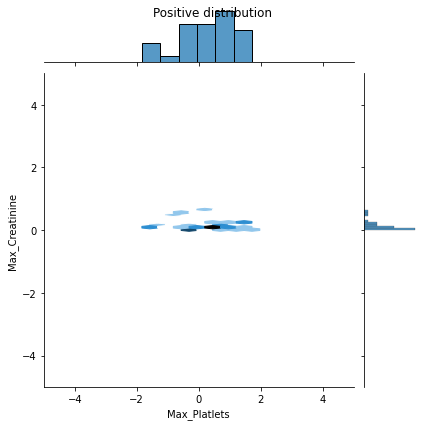

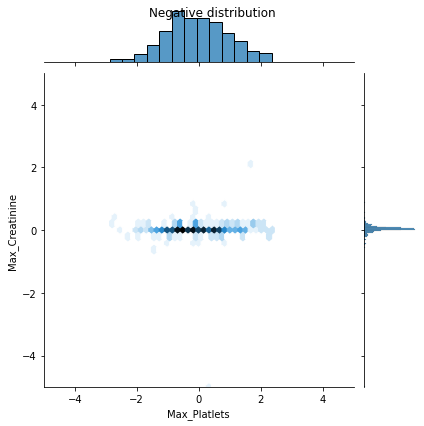

In [581]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(pos_df['Max_Platlets'], pos_df['Max_Creatinine'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['Max_Platlets'], neg_df['Max_Creatinine'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

In [582]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [583]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [584]:
model = make_model()
model.summary()

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 16)                320       
_________________________________________________________________
dropout_69 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_139 (Dense)            (None, 1)                 17        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [585]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.9774


In [586]:
initial_bias = np.log([pos/neg])
initial_bias

array([-2.40612577])

In [587]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.1596626 ],
       [0.12614477],
       [0.1099602 ],
       [0.07210982],
       [0.3204376 ],
       [0.07486036],
       [0.13749906],
       [0.08775386],
       [0.13796505],
       [0.31717333]], dtype=float32)

In [588]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.2893


In [589]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [590]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [591]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [592]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

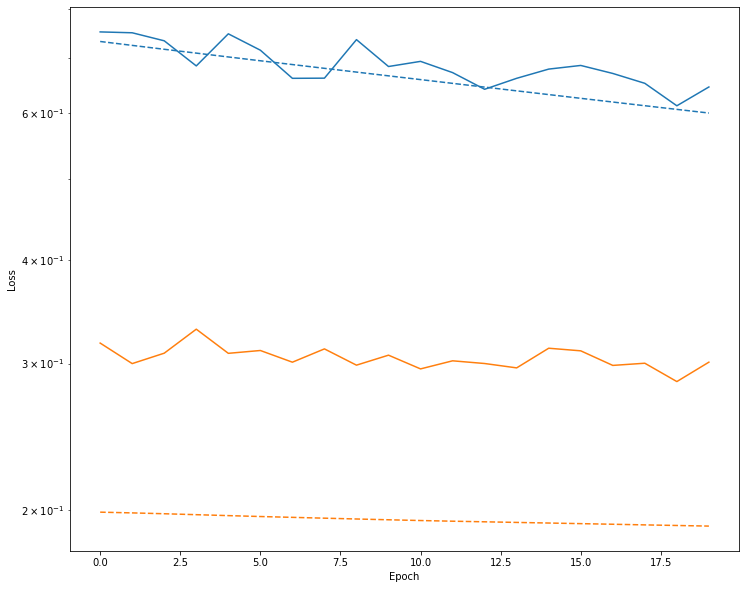

In [593]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [594]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.3196 - tp: 0.0000e+00 - fp: 4.0000 - tn: 389.0000 - fn: 32.0000 - accuracy: 0.9153 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5471 - val_loss: 0.1988 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 82.0000 - val_fn: 3.0000 - val_accuracy: 0.9647 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.3598
Epoch 2/100
1/1 [==============================] - 0s 47ms/step - loss: 0.3038 - tp: 0.0000e+00 - fp: 1.0000 - tn: 310.0000 - fn: 29.0000 - accuracy: 0.9118 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5927 - val_loss: 0.1983 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 82.0000 - val_fn: 3.0000 - val_accuracy: 0.9647 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.3618
Epoch 3/100
1/1 [==============================] - 0s 46ms/step - loss: 0.3018 - tp: 0.0000e+00 - fp: 4.0000 - tn: 307.0000 - fn: 29.0000 - accuracy: 0.9029 - precision: 0.0000e+00 - recall:

In [595]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

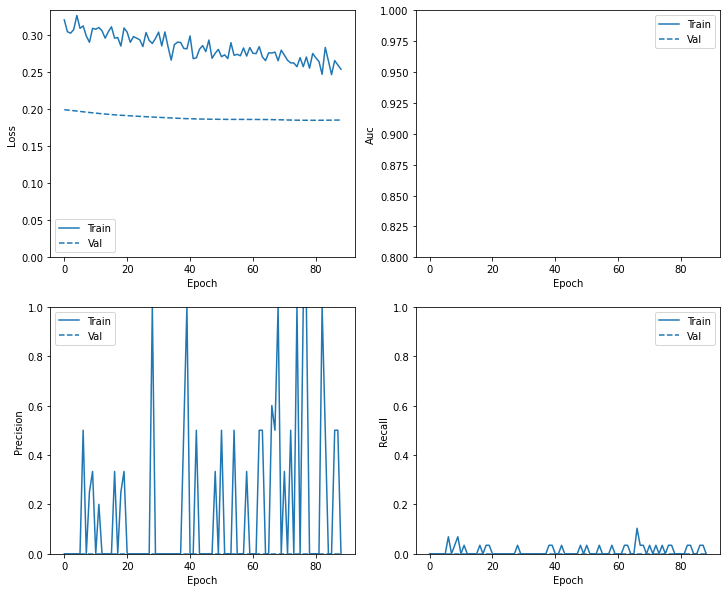

In [596]:
plot_metrics(baseline_history)

In [597]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [598]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.3349287211894989
tp :  0.0
fp :  0.0
tn :  95.0
fn :  12.0
accuracy :  0.8878504633903503
precision :  0.0
recall :  0.0
auc :  0.667543888092041

Legitimate Transactions Detected (True Negatives):  95
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  12
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  12


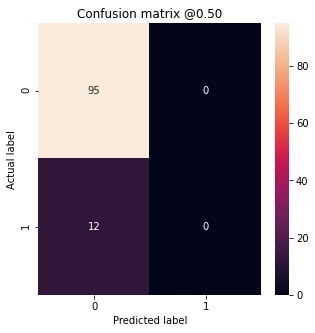

In [599]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [600]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

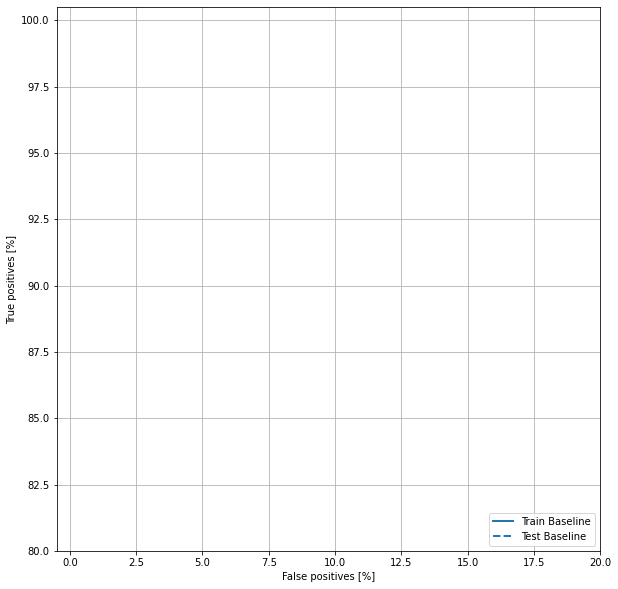

In [601]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [602]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.55
Weight for class 1: 6.05


In [603]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1.2910 - tp: 1.0000 - fp: 4.0000 - tn: 402.0000 - fn: 40.0000 - accuracy: 0.9016 - precision: 0.2000 - recall: 0.0244 - auc: 0.6273 - val_loss: 0.2005 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 82.0000 - val_fn: 3.0000 - val_accuracy: 0.9647 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.3618
Epoch 2/100
1/1 [==============================] - 0s 50ms/step - loss: 1.3304 - tp: 1.0000 - fp: 2.0000 - tn: 309.0000 - fn: 28.0000 - accuracy: 0.9118 - precision: 0.3333 - recall: 0.0345 - auc: 0.5328 - val_loss: 0.2015 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 82.0000 - val_fn: 3.0000 - val_accuracy: 0.9647 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.3598
Epoch 3/100
1/1 [==============================] - 0s 49ms/step - loss: 1.2859 - tp: 1.0000 - fp: 5.0000 - tn: 306.0000 - fn: 28.0000 - accuracy: 0.9029 - precision: 0.1667 - recall: 0.0345 - auc: 0.5687 - val_loss

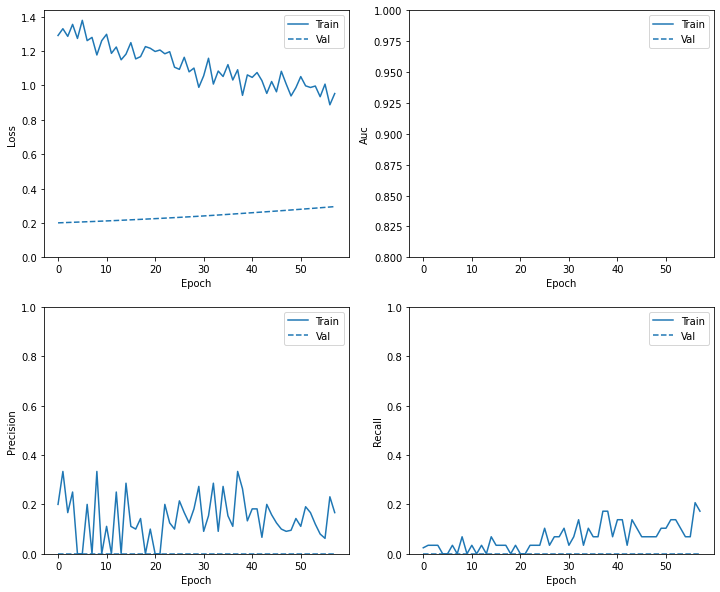

In [604]:
plot_metrics(weighted_history)

In [605]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.3306753933429718
tp :  3.0
fp :  3.0
tn :  92.0
fn :  9.0
accuracy :  0.8878504633903503
precision :  0.5
recall :  0.25
auc :  0.7166666984558105

Legitimate Transactions Detected (True Negatives):  92
Legitimate Transactions Incorrectly Detected (False Positives):  3
Fraudulent Transactions Missed (False Negatives):  9
Fraudulent Transactions Detected (True Positives):  3
Total Fraudulent Transactions:  12


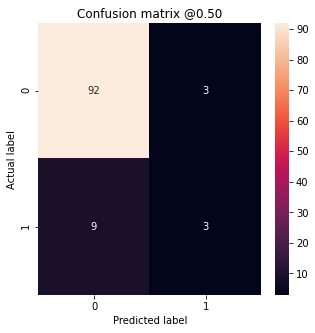

In [606]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

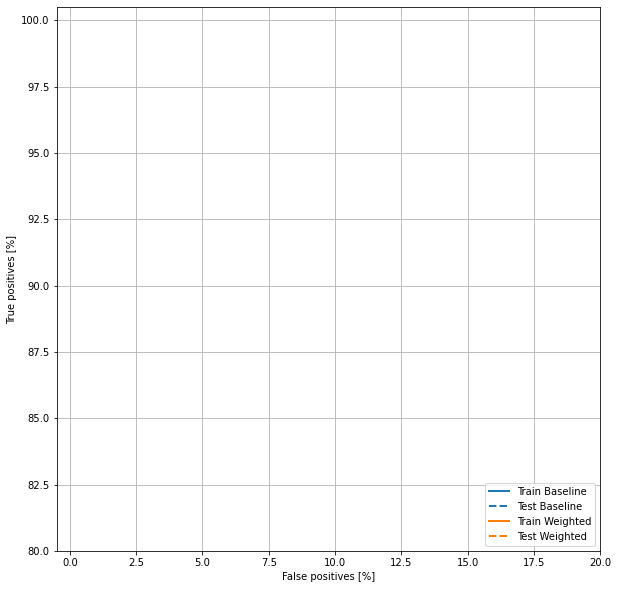

In [607]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [608]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [609]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(311, 19)

In [610]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(622, 19)

In [611]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [612]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [-1.38756209 -1.38762099 -1.80124363 -1.79954399  0.06798343 -0.3039551
 -1.23988444 -0.56417169  0.83374635  0.79006571 -0.6847034  -0.05431254
  0.          0.         -0.05431254 -0.11603795 -0.02260124 -0.46908901
  0.56259584]

Label:  1


In [613]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [614]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.49658203125


In [615]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

1.0

In [616]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.7369 - tp: 535.0000 - fp: 472.0000 - tn: 658.0000 - fn: 490.0000 - accuracy: 0.5536 - precision: 0.5313 - recall: 0.5220 - auc: 0.5932 - val_loss: 0.7382 - val_tp: 1.0000 - val_fp: 40.0000 - val_tn: 42.0000 - val_fn: 2.0000 - val_accuracy: 0.5059 - val_precision: 0.0244 - val_recall: 0.3333 - val_auc: 0.3699
Epoch 2/100
1/1 [==============================] - 0s 58ms/step - loss: 0.7316 - tp: 577.0000 - fp: 446.0000 - tn: 580.0000 - fn: 445.0000 - accuracy: 0.5649 - precision: 0.5640 - recall: 0.5646 - auc: 0.5840 - val_loss: 0.7368 - val_tp: 1.0000 - val_fp: 41.0000 - val_tn: 41.0000 - val_fn: 2.0000 - val_accuracy: 0.4941 - val_precision: 0.0238 - val_recall: 0.3333 - val_auc: 0.3679
Epoch 3/100
1/1 [==============================] - 0s 58ms/step - loss: 0.7293 - tp: 591.0000 - fp: 475.0000 - tn: 526.0000 - fn: 456.0000 - accuracy: 0.5454 - precision: 0.5544 - recall: 0.5645 - auc: 0.5769 - val_loss: 0.7355 - val_

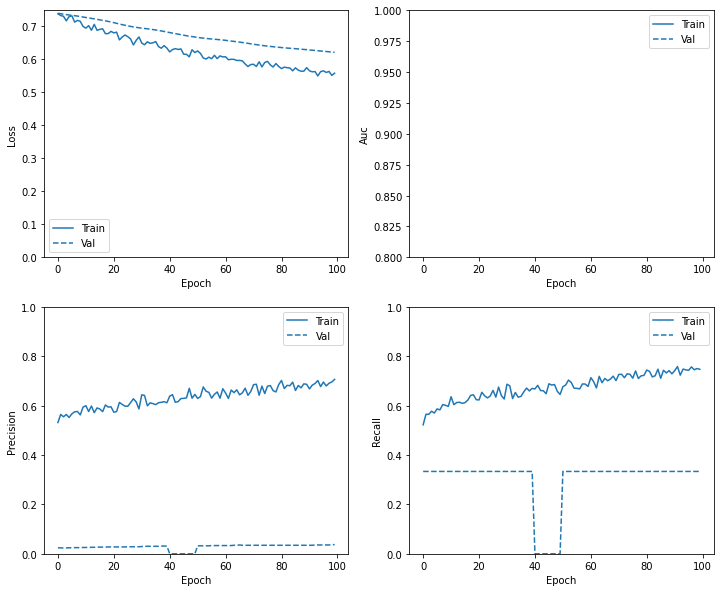

In [617]:
plot_metrics(resampled_history)

In [618]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 3s 71ms/step - loss: 0.7203 - tp: 6342.7143 - fp: 4976.5238 - tn: 6338.4762 - fn: 4857.7619 - accuracy: 0.5584 - precision: 0.5525 - recall: 0.5595 - auc: 0.5903 - val_loss: 0.7097 - val_tp: 1.0000 - val_fp: 35.0000 - val_tn: 47.0000 - val_fn: 2.0000 - val_accuracy: 0.5647 - val_precision: 0.0278 - val_recall: 0.3333 - val_auc: 0.3902
Epoch 2/1000
20/20 [==============================] - 0s 23ms/step - loss: 0.6593 - tp: 7197.3333 - fp: 4537.5714 - tn: 6544.9524 - fn: 4150.6190 - accuracy: 0.6098 - precision: 0.6110 - recall: 0.6304 - auc: 0.6597 - val_loss: 0.6853 - val_tp: 0.0000e+00 - val_fp: 31.0000 - val_tn: 51.0000 - val_fn: 3.0000 - val_accuracy: 0.6000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4411
Epoch 3/1000
20/20 [==============================] - 0s 23ms/step - loss: 0.6231 - tp: 7489.2857 - fp: 4377.0476 - tn: 6967.6190 - fn: 3596.5238 - accuracy: 0.6420 - precision: 0.6293 - recall: 0.6725 - au

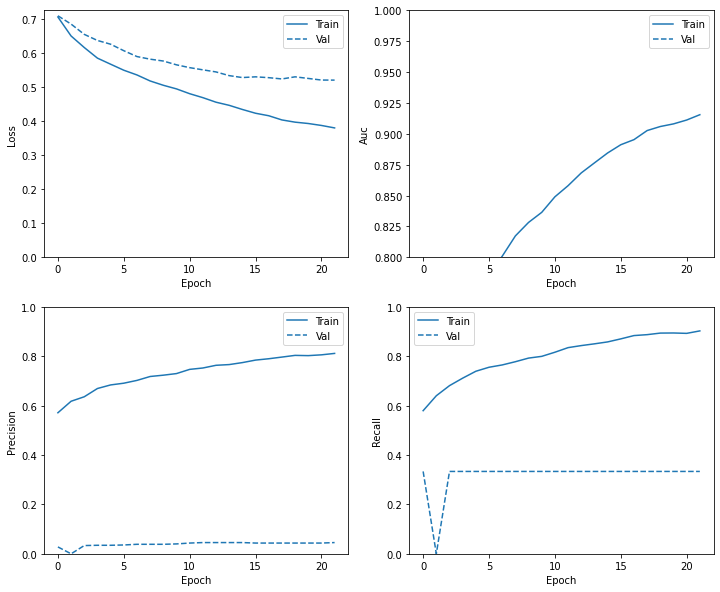

In [619]:
plot_metrics(resampled_history)

In [620]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.4979479908943176
tp :  8.0
fp :  19.0
tn :  76.0
fn :  4.0
accuracy :  0.7850467562675476
precision :  0.29629629850387573
recall :  0.6666666865348816
auc :  0.7241228222846985

Legitimate Transactions Detected (True Negatives):  76
Legitimate Transactions Incorrectly Detected (False Positives):  19
Fraudulent Transactions Missed (False Negatives):  4
Fraudulent Transactions Detected (True Positives):  8
Total Fraudulent Transactions:  12


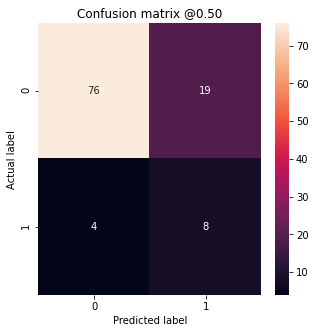

In [621]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

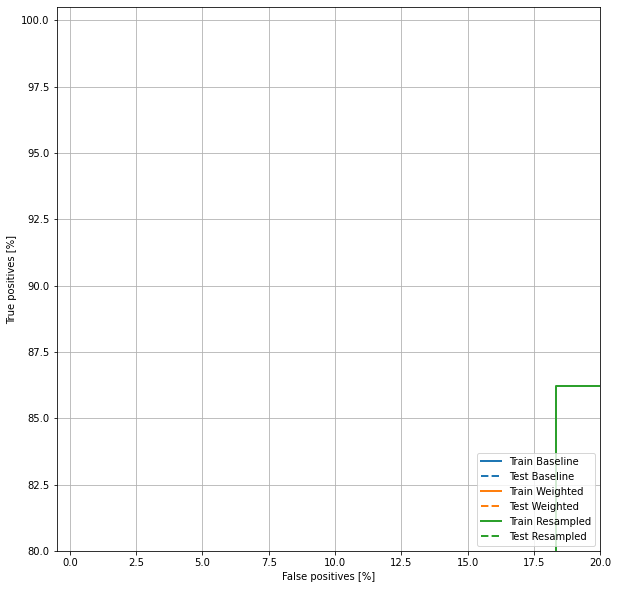

In [622]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')